In [1]:
import tensorflow as tf 

2022-03-16 19:26:41.108594: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
# Get the GPU device name.
device_name = tf.test.gpu_device_name()

# The device name should look like the following:
if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
else:
    raise SystemError('GPU device not found')

Found GPU at: /device:GPU:0


2022-03-16 19:26:42.070342: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-03-16 19:26:42.071595: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-03-16 19:26:42.106883: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-16 19:26:42.107128: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce GTX 1070 computeCapability: 6.1
coreClock: 1.7845GHz coreCount: 15 deviceMemorySize: 7.93GiB deviceMemoryBandwidth: 2

In [3]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: NVIDIA GeForce GTX 1070


Text(0.5, 0, 'Sentiment Score')

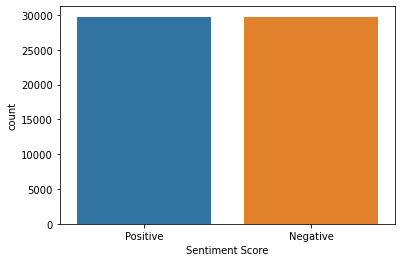

In [4]:
import pandas as pd 
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt 

df = pd.read_csv('CSVFiles/training-data-positive-and-negative-sentiment-english.csv')
df = df.drop('Unnamed: 0',axis=1)
# df = df.iloc[:,[1,7]]
# df = df[~df.Sentiment.str.contains("neutral")]
sns.countplot(x=df.Sentiment)
plt.xlabel('Sentiment Score')

In [5]:
encoded_label = {'Negative': 0, 'Positive': 1}
df['Sentiment'] = df['Sentiment'].map(encoded_label)
df.sample(10)

,Date,text,Sentiment
23478,2019-05-27,#QuarkChain #QKC#ETH,1
39437,2019-05-21,@BitcoinCom @rogerkver But the speed is betwee...,0
37301,2019-05-21,Mainstream Business Journalist Foolishly Warns...,0
13374,2019-05-27,현재 @BigONEexchange 에서 #TRX 를 사용할수 있습니다. #TRON...,1
21234,2019-05-27,Bitcoin (BTC) Price Rallies 10%: Bulls Remain ...,1
44462,2019-05-21,Who want to make $5 refer people to pei app ge...,0
24269,2019-05-27,"#CryptoCurrency #BTC #Bitcoin nears $9,000 as ...",1
58439,2019-05-21,@Zectro1 @oudekaas3 @cryptocached @justicemate...,0
23818,2019-05-27,"Bitcoin Hits New Yearly High Over $8,900 – Are...",1
5685,2019-05-27,SELL #bitcoin $btc $bcc $btg $eth $ltc,1


In [6]:
from transformers import BertTokenizer 

# load the BERT tokenizer 
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

In [7]:
# some regex to clean the data before passing it to BERT tokenizer  
import re 
df = df.replace(to_replace='https?:\/\/\S+', value='', regex=True) # remove https urls 
df = df.replace(to_replace="www\.[a-z]?\.?(com)+|[a-z]+\.(com)", value='', regex=True) # remove www urls 
df = df.replace(to_replace="\[video\]", value='', regex=True) # remove videos that got replaced with [video]
df = df.replace(to_replace='{link}', value='', regex=True) # remove links 
df = df.replace(to_replace='&[a-z]+;', value='', regex=True) # remove HTML embedded characters
df = df.replace(to_replace='@[^ ]+', value='', regex=True) # remove @usernames 

# some sample output 
tweets = df.text.values 
labels = df.Sentiment.values 
# import numpy as np
# labels = np.array(labels)

print(' Original: ', tweets[0])
print('Tokenized: ', tokenizer.tokenize(tweets[0]))
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(tweets[0])))

 Original:  È appena uscito un nuovo video! LES CRYPTOMONNAIES QUI PULVÉRISENT BITCOIN EN 2019 
Tokenized:  ['e', 'app', '##ena', 'usc', '##ito', 'un', 'nu', '##ovo', 'video', '!', 'les', 'crypt', '##omo', '##nna', '##ies', 'qui', 'pu', '##lver', '##isen', '##t', 'bit', '##co', '##in', 'en', '2019']
Token IDs:  [1041, 10439, 8189, 15529, 9956, 4895, 16371, 16059, 2678, 999, 4649, 19888, 19506, 9516, 3111, 21864, 16405, 26229, 28992, 2102, 2978, 3597, 2378, 4372, 10476]


In [8]:
from transformers import BertTokenizer 

# load the BERT tokenizer 
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

import re 
df = df.replace(to_replace='https?:\/\/\S+', value='', regex=True) # remove https urls 
df = df.replace(to_replace="www\.[a-z]?\.?(com)+|[a-z]+\.(com)", value='', regex=True) # remove www urls 
df = df.replace(to_replace="\[video\]", value='', regex=True) # remove videos that got replaced with [video]
df = df.replace(to_replace='{link}', value='', regex=True) # remove links 
df = df.replace(to_replace='&[a-z]+;', value='', regex=True) # remove HTML embedded characters
df = df.replace(to_replace='@[^ ]+', value='', regex=True) # remove @usernames 

# some sample output 
tweets = df.text.values 
labels = df.Sentiment.values 
# import numpy as np
# labels = np.array(labels)

print(' Original: ', tweets[0])
print('Tokenized: ', tokenizer.tokenize(tweets[0]))
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(tweets[0])))

 Original:  È appena uscito un nuovo video! LES CRYPTOMONNAIES QUI PULVÉRISENT BITCOIN EN 2019 
Tokenized:  ['e', 'app', '##ena', 'usc', '##ito', 'un', 'nu', '##ovo', 'video', '!', 'les', 'crypt', '##omo', '##nna', '##ies', 'qui', 'pu', '##lver', '##isen', '##t', 'bit', '##co', '##in', 'en', '2019']
Token IDs:  [1041, 10439, 8189, 15529, 9956, 4895, 16371, 16059, 2678, 999, 4649, 19888, 19506, 9516, 3111, 21864, 16405, 26229, 28992, 2102, 2978, 3597, 2378, 4372, 10476]


In [9]:
max_len = 0 

for i in range(len(tweets)):
    # tokenize the text and add `[CLS]` and `[SEP]` tokens 
    input_ids = tokenizer.encode(str(tweets[i]), add_special_tokens=True)
    
    #update max sentence length
    max_len = max(max_len, len(input_ids))
    
print('max sentence length: ', max_len)

max sentence length:  226


In [10]:
# we will set max_len to 235 
# now we can perform tokenization 
input_ids = [] 
attention_masks = [] 

for i in range(len(tweets)):
    encoded_dict = tokenizer.encode_plus(
                        str(tweets[i]),                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 64,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    # add encoded sentence to list 
    input_ids.append(encoded_dict['input_ids'])
    # add attention masks to list 
    attention_masks.append(encoded_dict['attention_mask'])
    
#convert the lists into tensors 
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)

print('Original: ', tweets[0])
print('Token IDs:', input_ids[0])

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/home/phil81/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:2251: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Original:  È appena uscito un nuovo video! LES CRYPTOMONNAIES QUI PULVÉRISENT BITCOIN EN 2019 
Token IDs: tensor([  101,  1041, 10439,  8189, 15529,  9956,  4895, 16371, 16059,  2678,
          999,  4649, 19888, 19506,  9516,  3111, 21864, 16405, 26229, 28992,
         2102,  2978,  3597,  2378,  4372, 10476,   102,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0])


In [11]:
# we will now divide our training data into training and validation sets (90/10)
from torch.utils.data import TensorDataset, random_split, DataLoader, RandomSampler, SequentialSampler

# set batch size to 32 for fine-tuning BERT 
batch_size = 32 

# combine training inputs into a training dataset 
dataset = TensorDataset(input_ids, attention_masks, labels)

training_size = int(0.9*len(dataset))
validation_size = len(dataset) - training_size

# Divide the dataset by randomly selecting samples.
train_dataset, val_dataset = random_split(dataset, [training_size, validation_size])

print('{:>5,} training samples'.format(training_size))
print('{:>5,} validation samples'.format(validation_size))
# THIS CONCLUDES PROCESSING OUR DATA FOR TRAINING 
# https://colab.research.google.com/drive/1pTuQhug6Dhl9XalKB0zUGf4FIdYFlpcX#scrollTo=6J-FYdx6nFE_ 

# create an iterator for our dataset using the torch DataLoader class, saving on memory during training and boost training speed 
train_dataloader = DataLoader(train_dataset, 
                                 sampler=RandomSampler(train_dataset), 
                                 batch_size=batch_size)
validation_dataloader = DataLoader(val_dataset, 
                                   sampler=RandomSampler(val_dataset), 
                                   batch_size=batch_size)

53,550 training samples
5,950 validation samples


In [12]:
from transformers import BertForSequenceClassification, AdamW, BertConfig

# Load BertForSequenceClassification, the pretrained BERT model with a single 
# linear classification layer on top. 
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased", # Use the 12-layer BERT model, with an uncased vocab.
    num_labels    = 2, 
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = False, # Whether the model returns all hidden-states.
)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [13]:
dfsample = df.sample(n=5000, ignore_index=True)
dfsample

,Date,text,Sentiment
0,2019-05-21,I am not here to support crypto in general...,0
1,2019-05-27,Scientists Discover The Algorithm of The Unive...,1
2,2019-05-21,Don't waste time with them. The worse group t...,0
3,2019-05-21,#Binance Buyer Volume Alert\nStage 2/3: Take o...,0
4,2019-05-21,Witaj! Korzystam z Coinbase – to prosta i bezp...,0
...,...,...,...
4995,2019-05-21,This is much better than Bitcoin wow I am impr...,0
4996,2019-05-21,Once a shitcoiner always a shitcoiner,0
4997,2019-05-21,Our #Crypto portfolio now \n#ZEC - 2.03 % \n#B...,0
4998,2019-05-21,#Bitcoin Has Soared Above #Intrinsic Value Dur...,0


In [14]:
tweets = dfsample.text.values 
labels = dfsample.Sentiment.values 

input_ids = [] 
attention_masks = [] 

for i in range(len(tweets)): 
    encoded_dict = tokenizer.encode_plus(
        str(tweets[i]),
        add_special_tokens = True, 
        max_length = 64, 
        pad_to_max_length=True, 
        return_attention_mask = True, 
        return_tensors = 'pt',
    )
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)

# Set the batch size.  
batch_size = 32  

# Create the DataLoader.
prediction_data = TensorDataset(input_ids, attention_masks, labels)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

/home/phil81/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:2251: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [15]:
# evaluate on our test set 
print('Predicting labels for {:,} test sentences...'.format(len(input_ids)))

# put model in evaluation mode \
model.to(device)
model.eval()

# variables for tracking labels 
predictions, true_labels = [], []

for batch in prediction_dataloader:
    # add batch to GPU 
    batch = tuple(t.to(device) for t in batch)
    
    # unpack inputs from dataloader 
    b_input_ids, b_input_mask, b_labels = batch 
    
    # tell model to not compute/store gradients 
    # saves memory and speeds up transaction 
    with torch.no_grad():
        # forward pass 
        result = model(b_input_ids,
                      token_type_ids=None,
                      attention_mask = b_input_mask,
                      return_dict=True)
        
    logits = result.logits 
    # move logits and labels to CPU 
    logits = logits.detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()
        
    predictions.append(logits)
    true_labels.append(label_ids)
    
print('DONE')

Predicting labels for 5,000 test sentences...
DONE


In [16]:
print('Positive samples: %d of %d (%.2f%%)' % (dfsample.Sentiment.sum(), len(dfsample.Sentiment), (dfsample.Sentiment.sum() / len(dfsample.Sentiment) * 100.0)))

Positive samples: 2490 of 5000 (49.80%)


In [17]:
from sklearn.metrics import matthews_corrcoef

matthews_set = []

# Evaluate each test batch using Matthew's correlation coefficient
print('Calculating Matthews Corr. Coef. for each batch...')

for i in range(len(true_labels)):
    # The predictions for this batch are a 2-column ndarray (one column for "0" 
    # and one column for "1"). Pick the label with the highest value and turn this
    # in to a list of 0s and 1s.
    pred_labels_i = np.argmax(predictions[i], axis=1).flatten()
    
    matthews = matthews_corrcoef(true_labels[i], pred_labels_i)
    matthews_set.append(matthews)
    


Calculating Matthews Corr. Coef. for each batch...


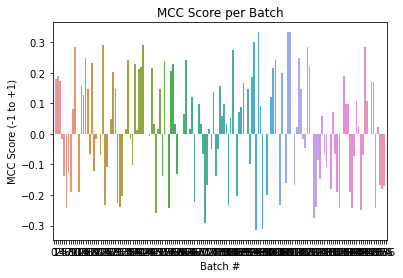

In [18]:
ax = sns.barplot(x=list(range(len(matthews_set))), y=matthews_set, ci=None)

plt.title('MCC Score per Batch')
plt.ylabel('MCC Score (-1 to +1)')
plt.xlabel('Batch #')

plt.show()

In [19]:
# https://vitalflux.com/accuracy-precision-recall-f1-score-python-example/
from sklearn.metrics import confusion_matrix

flat_predictions = np.concatenate(predictions, axis=0)
flat_predictions = np.argmax(flat_predictions, axis=1).flatten()

flat_true_labels = np.concatenate(true_labels, axis=0)

conf_matrix = confusion_matrix(y_true=flat_true_labels, y_pred=flat_predictions)

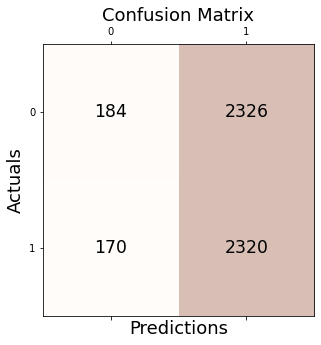

In [20]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [21]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score 
print('Precision: %.3f' % precision_score(flat_true_labels, flat_predictions))
print('Recall: %.3f' % recall_score(flat_true_labels, flat_predictions))
print('Accuracy: %.3f' % accuracy_score(flat_true_labels, flat_predictions))
print('F1 Score: %.3f' % f1_score(flat_true_labels, flat_predictions))

Precision: 0.499
Recall: 0.932
Accuracy: 0.501
F1 Score: 0.650


Text(0.5, 0, 'Sentiment Score')

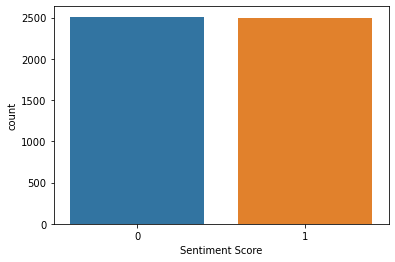

In [22]:
sns.countplot(x=dfsample.Sentiment)
plt.xlabel('Sentiment Score')